In [7]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import Planck18
from scipy.optimize import minimize

# Maths
$$
H(z) = H_0 [\Omega_M(1+z)^3+(1-\Omega_M)(1+z)^{3(1+w)}]^{0.5}
$$

$$
ln H(z) = ln H_0 + 0.5~ln [\Omega_M(1+z)^3+(1-\Omega_M)(1+z)^{3(1+w)}]
$$

$$
\frac{dH(z)}{H(z)} = \frac{dH_0}{H_0} + 0.5~\frac{[1-(1+z)^{3w}]d\Omega_M+(1-\Omega_M)3(1+z)^{3w}ln(1+z)dw}{[\Omega_M+(1-\Omega_M)(1+z)^{3w}]}
$$

In [3]:
H0 = Planck18.H0
Om = Planck18.Om0
w = -1

In [4]:
fracH0 = 1/100
fracOm = 1/100
fracw = 10/100

In [5]:
def fracHz(z):
    var = (1+z)**(3*w)
    num = (1-var)*fracOm*Om + (1-Om)*3*var*np.log(1+z)*fracw*w
    den = Om + (1-Om)*var
    return fracH0 + 0.5*(num/den)

In [11]:
zmin = minimize(fracHz, 1).x

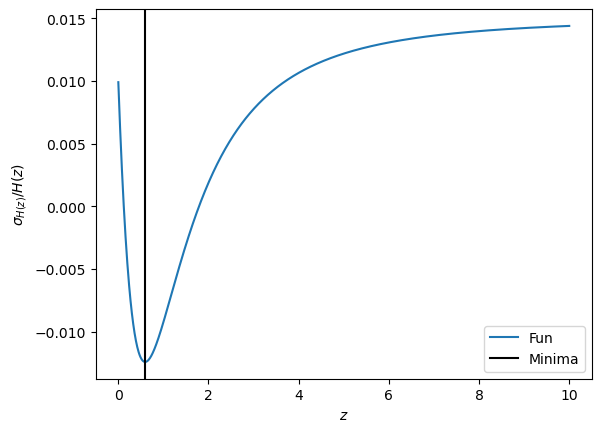

In [21]:
z = np.linspace(0.001, 10, 1000)
plt.plot(z, fracHz(z), label='Fun')
plt.axvline(zmin, color='k', label='Minima')
plt.xlabel(r'$z$')
plt.ylabel(r'$\sigma_{H(z)}/H(z)$')
plt.legend()

In [23]:
print('pivotal redshift is=', zmin[0])

pivotal redshift is= 0.5964507568652403
